# DIFFERENCE BETWEEN GS AND TEMPLATES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


comp = 1
df_gs = pd.read_csv(f'./A{comp}B/relaxation/GroundStates.txt', header=None, na_filter=False)
df_temp = pd.read_csv(f'./A{comp}B/relaxation/RELAX_DATA', header=None, na_filter=False)
ticks_labels = []
for i in range(1,len(df_temp.columns)):
    ticks_labels.append(f'{df_temp.loc[0,i].split("_")[0]} {df_temp.loc[0,i].split("_")[1]}')
names_couples = [i.split()[0] for i in ticks_labels]

for i in range(1,len(df_temp[0])):
    if df_temp.loc[i,0] != 'AlN':
        continue
    diff = np.zeros(len(df_temp.columns)-1)
    for j in range(1,len(df_temp.columns)):
        
        diff[j-1] = float(df_temp.loc[i,j])-float(df_gs[df_gs[0]==df_temp.loc[i,0]][1].values[0])
        
    fig, ax = plt.subplots(1,1, figsize=(18,5))
    title = f'{df_temp.loc[i,0]}'
    ax.set_title(title, fontsize=20)
    ax.set_ylabel('Energy difference (eV/atom)', fontsize=18)
    ax.set_xlabel('Template', fontsize=18)
    ax.set_xlim(0,len(df_temp.columns))

    ax.bar(np.arange(1,len(df_temp.columns)), diff, edgecolor='black', color='skyblue', lw=1)
    ax.set_xticks(np.arange(1,len(df_temp.columns)))
    ax.set_xticklabels(ticks_labels, fontsize=8, rotation=90)
    ax.grid(ls=':')

    if df_temp.loc[i,0] in names_couples:
        idx_couple = np.where(np.array(names_couples)==df_temp.loc[i,0])[0]
        for idx in idx_couple:
            ax.axvline(idx+1, color='red', lw=3, ls='--')

    fig.savefig(f'{title}.png', bbox_inches="tight")
    plt.close(fig)


In [ ]:
import numpy as np
a = ['a', 'a']
np.where(np.array(a)=='a')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os



comp = 1

df_gs = pd.read_csv(f'./A{comp}B/relaxation/GroundStates.txt', header=None, na_filter=False)
df_temp = pd.read_csv(f'./A{comp}B/relaxation/RELAX_DATA', header=None, na_filter=False)

ticks_labels = []
diff = np.zeros(105)
diff1 = np.zeros(105)
gen_couples = [f'{df_temp.loc[0,i].split("_")[0]}' for i in range(1,len(df_temp.columns))]
for i in range(1, 106):
    ticks_labels.append(f'{df_temp.loc[i,0]}')
    times_in_gen = gen_couples.count(f'{df_temp.loc[i,0]}')
    singlediff = []
    singlediff1 = []
    for j in range(1,len(df_temp.columns)):
        singlediff.append(float(df_temp.loc[i,j])-float(df_gs[df_gs[0]==df_temp.loc[i,0]][1].values[0]))
        if df_temp.loc[i,0] == df_temp.loc[0,j].split("_")[0]:
            continue
        singlediff1.append(float(df_temp.loc[i,j])-float(df_gs[df_gs[0]==df_temp.loc[i,0]][1].values[0]))
    singlediff = np.array(singlediff)
    singlediff = np.sort(singlediff)
    diff[i-1] = singlediff[0]
    singlediff1 = np.array(singlediff1)
    singlediff1 = np.sort(singlediff1)
    diff1[i-1] = singlediff1[0]

fig, ax = plt.subplots(1,1, figsize=(20,8))
title = 'Enthalpy difference between ground state and lowest enthalpy template'
ax.set_title(title, fontsize=22, y=1.05)
ax.set_ylabel(r'$\Delta$H (eV/atom)', fontsize=22)
ax.axes.yaxis.set_label_coords(-0.06,0.5)
ax.set_xlabel('Element Pair', fontsize=22)
ax.axes.xaxis.set_label_coords(0.5,-0.1)
ax.set_xlim(0,106)

ax.set_yticks(np.arange(-0.2,0.7,0.1))
ax.set_yticklabels(np.round(np.arange(-0.2,0.7,0.1), decimals=1), fontsize=15)

ax.set_xticks(np.arange(1,106))
ax.set_xticklabels(ticks_labels, fontsize=10, rotation=90)
ax.grid(ls=':')

ax.hbar(np.arange(1,106), diff1, edgecolor='black', color='crimson', lw=1, label='Only considering other templates')
ax.hbar(np.arange(1,106), diff, edgecolor='black', color='green', lw=1, label='Also with their templates')
ax.legend(loc='upper right', fontsize=13)

fig.savefig(f'{title}.png', bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,18))
title = 'Enthalpy difference between\nground state and lowest enthalpy template'
ax.set_title(title, fontsize=22, y=1.01)
ax.set_xlabel(r'$\Delta$H (eV/atom)', fontsize=22)
ax.axes.yaxis.set_label_coords(-0.08,0.5)
ax.set_ylabel('Element Pair', fontsize=22)
ax.axes.xaxis.set_label_coords(0.5,-0.03)
ax.set_ylim(0,106)

ax.set_xticks(np.arange(-0.2,0.7,0.1))
ax.set_xticklabels(np.round(np.arange(-0.2,0.7,0.1), decimals=1), fontsize=15)

ax.set_yticks(np.arange(1,106))
ax.set_yticklabels(ticks_labels, fontsize=10, rotation=0)
ax.grid(ls=':')

ax.barh(np.arange(1,106),diff1,   edgecolor='black', color='crimson', lw=1, label='Only considering other templates')
ax.barh(np.arange(1,106), diff,  edgecolor='black', color='green', lw=1, label='Also with their templates')
ax.legend(loc='upper right', fontsize=13)



In [ ]:
print('names', names)
print('singlediff', singlediff)
print('id_comp', id_comp)
print(df_temp.loc[i,0])

# MEDIUM ERR VS TEMP EXTRACTED


In [ ]:
# ERROR BEFORE 

from template_csp import managetemp as mte
import numpy as np
import pandas as pd

comp = 1
test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']


ErrBefore = np.zeros((2,57))
for n_temp_gen in range(1, 58):
    err_single_set = np.zeros(50)
    for id_set in range(50):
        initial_set = mte.TemplateSet(test_elements, f'RANDOM/FULL50sets/{n_temp_gen}/TemplateSet_{id_set}')
        err_single_set[id_set] = initial_set.err_before()
    ErrBefore[0][n_temp_gen-1] = np.mean(err_single_set)
    ErrBefore[1][n_temp_gen-1] = np.std(err_single_set)
    print(f'Error for {n_temp_gen} templates: {ErrBefore[0][n_temp_gen-1]}')

df = pd.DataFrame(ErrBefore)
df.to_csv(f'RANDOM/FULL50sets/ErrBefore.csv', index=False, header=False)
    

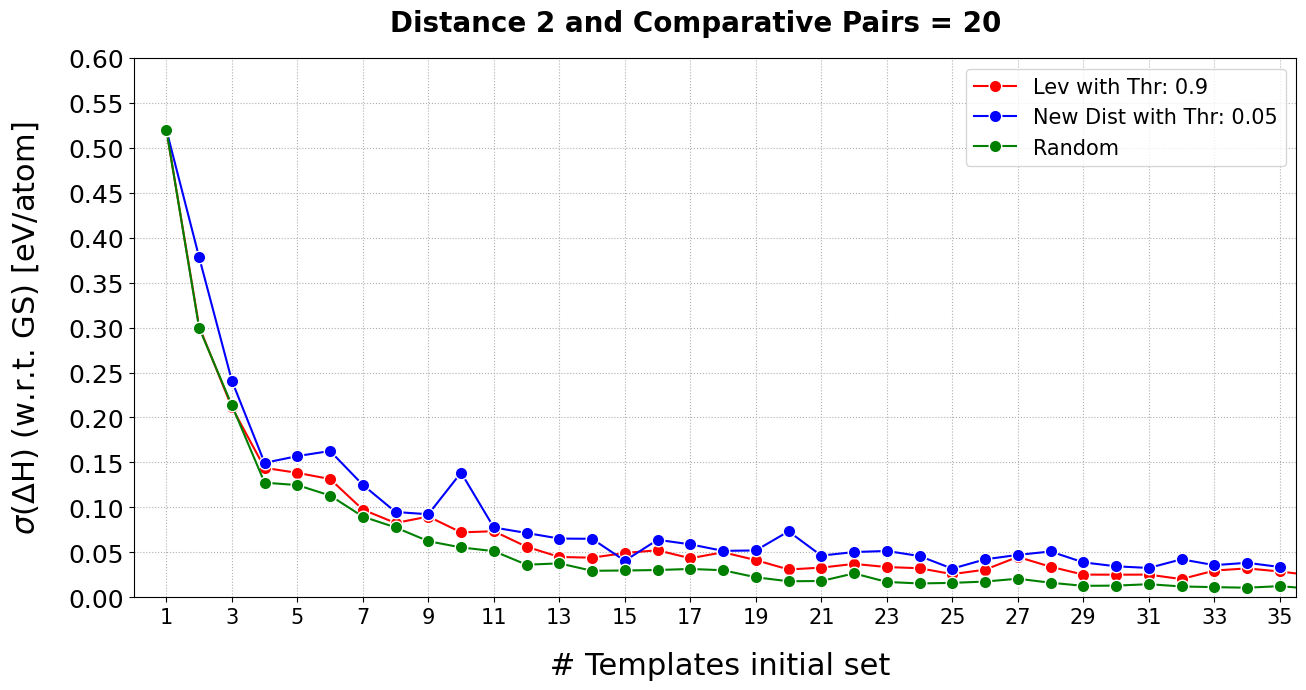

In [39]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './'

title = f'Distance 2 and Comparative Pairs = 20'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')

dir_name = './RANDOM/FULL50sets'
df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
tot = (df_tot.to_numpy()).T

x = np.arange(1, len(tot[0])+1) 

color = 'red'
ax.plot(x, tot[1], color = color , marker = 'o', markeredgecolor='white', markersize=9, label='Lev with Thr: 0.9')

dir_name = 'DIFFERENT_DISTANCES_RED/dist2'
df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
tot = (df_tot.to_numpy()).T

x = np.arange(1, len(tot[0])+1) 

color = 'blue'
ax.plot(x, tot[1], color = color , marker = 'o', markeredgecolor='white', markersize=9, label = 'New Dist with Thr: 0.05')


dir_name = 'RANDOM/FULL50sets'
df_tot = pd.read_csv(mother_dir + f'{dir_name}/ErrBefore.csv', header=None, na_filter=False)
tot = (df_tot.to_numpy())

x = np.arange(1, len(tot[0])+1) 

color = 'green'
ax.plot(x, tot[1], color = color , marker = 'o', markeredgecolor='white', markersize=9, label = 'Random')

ax.set_ylabel(r'$\sigma(\Delta$H) (w.r.t. GS) [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.08, 0.5)

step = 0.1
y_ticks  = np.arange(0,0.7,0.05)
y_ticks = np.round(y_ticks, decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=18)
ax.grid(True, ls=':')
ax.legend(loc='upper right', fontsize=15)
ax.set_ylim(0,0.6)

ax.set_xlabel(' # Templates initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

xticks = np.arange(1,58, 2)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,35.5)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}'.format(y)))
ax.set_xticklabels(xticks, fontsize=15, rotation=0)

plt.show()
fig.savefig('Std_vs_NTempInit___dist2.png', bbox_inches="tight")

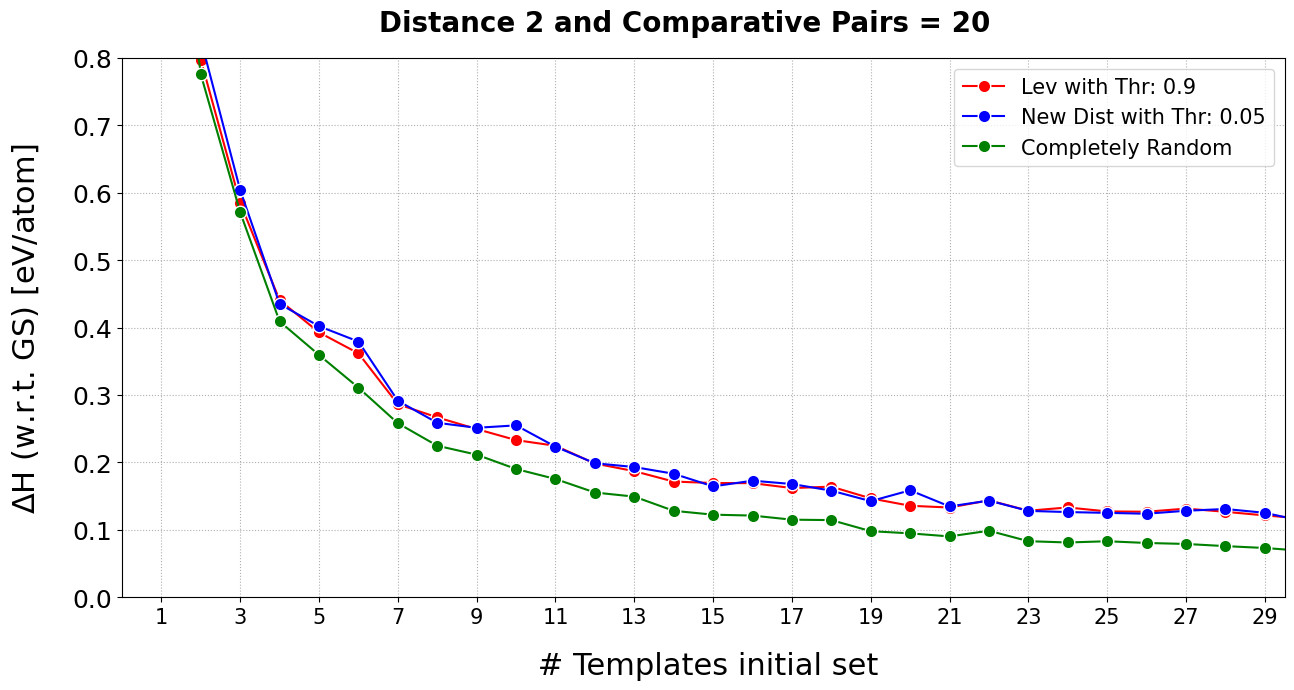

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './'

title = f'Distance 2 and Comparative Pairs = 20'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')

dir_name = 'RANDOM/FULL50sets'
df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
tot = (df_tot.to_numpy()).T

x = np.arange(1, len(tot[0])+1) 

color = 'red'
ax.plot(x, tot[0], color = color , marker = 'o', markeredgecolor='white', markersize=9, label='Lev with Thr: 0.9')

# color = 'black'
# y = np.loadtxt('errorsRandomRed.txt')
# x = np.arange(1, len(y)+1)
# ax.plot(x, y, color = color , marker = 'o', markeredgecolor='white', markersize=9, label='Random reduction')


dir_name = './DIFFERENT_DISTANCES_RED/dist2'
df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
tot = (df_tot.to_numpy()).T

x = np.arange(1, len(tot[0])+1) 

color = 'blue'
ax.plot(x, tot[0], color = color , marker = 'o', markeredgecolor='white', markersize=9, label='New Dist with Thr: 0.05')

dir_name = 'RANDOM/FULL50sets'
df_tot = pd.read_csv(mother_dir + f'{dir_name}/ErrBefore.csv', header=None, na_filter=False)
tot = (df_tot.to_numpy())

x = np.arange(1, len(tot[0])+1) 

color = 'green'
ax.plot(x, tot[0], color = color , marker = 'o', markeredgecolor='white', markersize=9, label='Completely Random')

ax.set_ylabel(r'$\Delta$H (w.r.t. GS) [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)

step = 0.1
y_ticks  = np.arange(0.0,1.3,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=18)
ax.set_ylim(0,0.8)

ax.set_xlabel(' # Templates initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

xticks = np.arange(1,58, 2)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,29.5)
ax.set_xticklabels(xticks, fontsize=15, rotation=0)

ax.grid(True, ls=':')
ax.legend(loc='upper right', fontsize=15)

plt.show()
fig.savefig('Ent_vs_NTempInit_dist2.png', bbox_inches="tight")


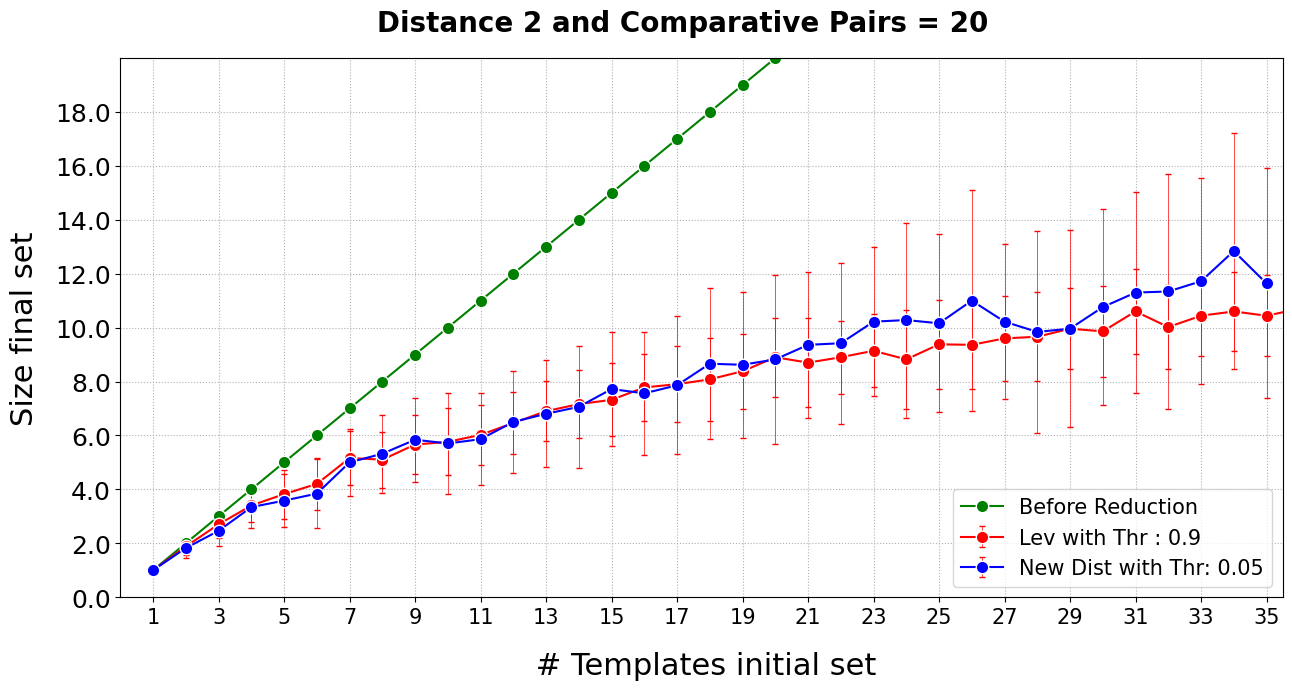

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './'
n_possible_couples = 1

title = f'Distance 2 and Comparative Pairs = 20'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')

dir_name = './RANDOM/FULL50sets/'
df_numtemp = pd.read_csv(mother_dir + f'{dir_name}/NumberTempRedu.csv', header=None, na_filter = False, index_col = 0)
numtemp = df_numtemp.to_numpy()
x = np.arange(1, len(numtemp[0])+1)

color = 'red'
ax.errorbar(x, numtemp[0], yerr=numtemp[1], color = color , ecolor='red', elinewidth=0.5, capsize=2, marker = 'o', markeredgecolor='white', markersize=9, label='Lev with Thr : 0.9')

dir_name = 'DIFFERENT_DISTANCES_RED/dist2'
df_numtemp = pd.read_csv(mother_dir + f'{dir_name}/NumberTempRedu.csv', header=None, na_filter = False, index_col = 0)
numtemp = (df_numtemp.to_numpy()).T
x = np.arange(1, len(numtemp[0])+1) 

color = 'blue'
ax.errorbar(x, numtemp[0], yerr=numtemp[1], color = color , ecolor='red', elinewidth=0.5, capsize=2, marker = 'o', markeredgecolor='white', markersize=9, label='New Dist with Thr: 0.05')


x = np.arange(1, len(numtemp[0])+1)
numtemp = x 

color = 'green'
ax.plot(x, numtemp, color = color , marker = 'o', markeredgecolor='white', markersize=9, label='Before Reduction')


ax.set_ylabel('Size final set', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)

step = 2
y_ticks  = np.arange(0,20,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=0)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=18)
ax.set_ylim(0,20)

ax.set_xlabel(' # Templates initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

xticks = np.arange(1,58, 2)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,35.5)
ax.set_xticklabels(xticks, fontsize=15, rotation=0)

ax.grid(True, ls=':')
ax.legend(loc='lower right', fontsize=15)

plt.show()
fig.savefig('NTempFin_vs_NtempInit__dist2.png', bbox_inches="tight")

# RANDOM REDUCTION

In [18]:
from template_csp import managetemp as mte
import numpy as np
from tqdm import tqdm
import random
import pandas as pd


test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
a = [1,2,3,3,4,4,5,5,6,6,6,7,7,7,7,8,8,8,8,8,8,8,9,9,10,10,10,10,10]
y=[]
comp = 1
df = pd.read_csv(f'A{comp}B/relaxation/RELAX_DATA', sep=",", index_col=0, na_filter = False)
gs_df = pd.read_csv(f'A{comp}B/relaxation/GroundStates.txt', sep=",", na_filter = False)


for n in range(29):
    err = np.zeros(50)
    for m in range(50):
        template_set = mte.TemplateSet(test_elements, f'RANDOM/FULL50sets/{n+1}/TemplateSet_{m}')
        final_set = random.sample(template_set.couples, a[n])
        differences = []
        for k in range(len(test_elements)):
                    for l in range(k+1,len(test_elements)):
                    
                        cp = [test_elements[k], test_elements[l]]
                        cp.sort()
                        try_couple = cp[0]+cp[1]

                        ent_gs = (gs_df.loc[gs_df['COUPLES'] == try_couple].iloc[0,1]) #already per atom  
                        ent_temp = np.zeros(len(final_set))
                        for j, i in enumerate(final_set):
                            ent_temp[j] = df.loc[try_couple, f'{i[0][0]+i[0][1]}_{i[1]}'] #already per atom
                        ent_temp.sort()
                        differences.append( -( ent_gs - ent_temp[0] )) 
        for i in differences:
            err[m] += max(i/len(differences), 0)
    y.append(np.mean(err))



In [25]:
np.savetxt('errorsRandomRed.txt', np.array(y))

# MEAN ERR vs NTEMP FINAL

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from template_csp import managetemp as mte
from tqdm import tqdm
import json

# test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

# hyperparameters = { 
#     "weight_occurrence" : 1,
#     "weight_sg" : 0.001,
#     "weight_formation_entalphy" : 1, 
#     "lev_red" : 0.9
# }

# mother_dir = './FULL20sets/'
# n_sets = 20

# errors = {}
# for i in tqdm(os.listdir(mother_dir)):
#     if i.endswith('.csv') or i.endswith('.json'):
#         continue
#     for j in range(n_sets):

#         template_set = mte.TemplateSet(test_elements, mother_dir + i + f'/TemplateSet_{j}')
#         reduction_set = mte.PairSet(template_set, test_elements, mother_dir + i + f'/PairSet_{j}')
#         n_finale_temp = len(reduction_set.reduced_set(hyperparameters))
#         error = reduction_set.total_error(hyperparameters)

#         if f'{n_finale_temp}' in errors.keys():
#             errors[f'{n_finale_temp}'].append(error)
#         else:
#             errors[f'{n_finale_temp}'] = [error]

# with open('FULL/NTempFin_Err.json', 'w') as f:
#     json.dump(errors, f)

import json
with open('FULL20sets/NTempFin_Err.json', 'r') as f:
    errors = json.load(f)
    
n_temp = np.zeros(len(errors.keys()))
stds = np.zeros(len(errors.keys()))
en = np.zeros(len(errors.keys()))

for idx, i in enumerate(errors.keys()):
    n_temp[idx] = int(i)
    en[idx] = np.mean(np.array(errors[i]))
    stds[idx] = np.std(np.array(errors[i]))


title = f'Threshold for Reduction = 0.9 and Comparative Pairs = 105'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=22, y=0.95)

sorted_idx = np.argsort(n_temp)
n_temp = n_temp[sorted_idx]
en = en[sorted_idx]
stds = stds[sorted_idx]

ax.errorbar(n_temp, en, yerr=stds, color = 'blue', ecolor='red', elinewidth=1, capsize=2, marker = 'o',markersize = 10,  markeredgecolor='white')

n_temp = n_temp.astype(int)
ax.set_xticks(n_temp)
ax.set_xticklabels(n_temp, fontsize=18)
ax.set_xlabel('Size final set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

yticks = np.arange(0, 1.8, 0.2)
ax.set_ylim(0, 1.8)
yticks = np.round(yticks, decimals=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=15)
ax.set_ylabel(r'$\Delta$H w.r.t. GS [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)

ax.grid(True, ls=':')
fig.savefig('NTempFin_Err.png', bbox_inches="tight")


# JSON2CSV

In [ ]:
import json
import os
import pandas as pd
import re

with open('A1B/relaxation/ent.json') as f:
    data = json.load(f)

columns = []
rows = []
for key in data['1'].keys():
    rows.append(key)
    for k in data['1'][key].keys():
        name = re.search(r'([A-Za-z]*)(\d+)', k).group(1)
        sg = re.search(r'([A-Za-z]*)(\d+)', k).group(2)
        if f'{name}_{sg}' not in columns:
            columns.append(f'{name}_{sg}')
    
df = pd.DataFrame(index=rows ,columns=columns)

for key in data['1'].keys():
    for k in data['1'][key].keys():
        name = re.search(r'([A-Za-z]*)(\d+)', k).group(1)
        sg = re.search(r'([A-Za-z]*)(\d+)', k).group(2)
        df.loc[key, f'{name}_{sg}'] = data['1'][key][k]

df.to_csv('A1B/relaxation/RELAX_DATA')
with open('A1B/relaxation/RELAX_DATA', 'r') as f:
    lines = f.readlines()
lines[0] = 'COUPLES' + lines[0]
with open('A1B/relaxation/RELAX_DATA', 'w') as f:
    f.writelines(lines)


# OCCURRENCE, FORMATION ENT, LEV DIST

In [ ]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './FULL5sets/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './FULL5sets/20/PairSet_0')
lev_dist = pair_set.dist_matrix()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,14), width_ratios=[11, 12.2])
title = f'Initial Set'
ax.set_title(title, fontsize=22, y=1.02)
im = ax.imshow(lev_dist, cmap='plasma')
im.set_clim(0.7, 1)
ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_yticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax.set_yticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
lev_dist = np.delete(lev_dist, idx_to_remove, axis=0)
lev_dist = np.delete(lev_dist, idx_to_remove, axis=1)
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]

title = f'Final Set'
ax1.set_title(title, fontsize=22, y=1.02)
im = ax1.imshow(lev_dist, cmap='plasma')
im.set_clim(0.7, 1)
cbar = fig.colorbar(im, ax=ax1, orientation='vertical', fraction=0.046, pad=0.05, ticks = np.arange(0, 1.1, 0.1)) 
ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_yticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax1.set_yticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15)
plt.show()
fig.savefig('LevDistMat.png', bbox_inches="tight")

In [ ]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './RANDOM/FULL5sets/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './RANDOM/FULL5sets/20/PairSet_0')
formation_enthalpy = pair_set.formation_percentage()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,6), sharey=True)

title = f'Initial Set'
ax.set_title(title, fontsize=22, y=1.02)
ax.bar(np.arange(len(template_set.couples)), np.zeros(len(template_set.couples))+1, color='grey', edgecolor='black', label='Formation Enthalpy > 0')
ax.bar(np.arange(len(template_set.couples)), formation_enthalpy, color='lightgreen', edgecolor='black', label='Formation Enthalpy < 0')

ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax.legend(fontsize=15)
ax.grid(True, ls=':', axis='y', color='black')

ax.set_ylabel('% of all compounds', fontsize=22)
ax.yaxis.set_label_coords(-0.10, 0.5)
yticks = np.arange(0,1.1,0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(i*100)}%' for i in yticks], fontsize=15)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]
formation_enthalpy = np.delete(formation_enthalpy, idx_to_remove)

title = f'Final Set'
ax1.set_title(title, fontsize=22, y=1.02)
ax1.bar(np.arange(len(template_set.couples)), np.zeros(len(template_set.couples))+1, color='grey', edgecolor='black', label='Formation Enthalpy < 0')
ax1.bar(np.arange(len(template_set.couples)), formation_enthalpy, color='lightgreen', edgecolor='black', label='Formation Enthalpy > 0')

ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax1.legend(fontsize=15)
ax1.grid(True, ls=':', axis='y', color='black')


fig.subplots_adjust(wspace=0.01)
plt.show()
fig.savefig('FormationEnt.png', bbox_inches="tight")

In [ ]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './FULL5sets/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './FULL5sets/20/PairSet_0')
isto = pair_set.template_gs()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,6), sharey=True)

title = f'Initial Set'
ax.set_title(title, fontsize=22, y=1.02)
ax.bar(np.arange(len(template_set.couples)), isto, color='crimson', edgecolor='black', alpha=0.8)

ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax.grid(True, ls=':', axis='y', color='black')

ax.set_ylabel('Lowest Energy template', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)
yticks = np.arange(0,25,2)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=15)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]
isto = np.delete(isto, idx_to_remove)

title = f'Final Set'
ax1.set_title(title, fontsize=22, y=1.02)
ax1.bar(np.arange(len(template_set.couples)), isto, color='crimson', edgecolor='black', alpha=0.8)

ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax1.grid(True, ls=':', axis='y', color='black')

fig.subplots_adjust(wspace=0.01)
plt.show()
fig.savefig('Occurrence.png', bbox_inches="tight")